In [1]:
from utils.binaries import *
from utils.plotting import *

15:53:39 ( +325.7s) [INFO   ] -- import logging
15:53:39 (  +215ms) [INFO   ] -- import numpy as np
15:53:39 (   +18ms) [INFO   ] -- import uncertainties
15:53:40 (  +806ms) [INFO   ] -- import pandas as pd
15:53:40 (    +2ms) [WARNING] -- pandas support to be dropped at some point!
15:53:40 (    +2ms) [INFO   ] -- import binaries.tools as tools
15:53:41 (  +627ms) [INFO   ] -- import matplotlib.pyplot as plt
15:53:42 (  +856ms) [INFO   ] -- import seaborn as so
15:53:42 (    +3ms) [INFO   ] -- set MONI_PATH = PosixPath('/cr/work/filip/monit_and_sd')
15:53:42 (    +1ms) [INFO   ] -- set HIST_PATH = PosixPath('/cr/work/filip/monit_and_sd')
15:53:42 (    +0ms) [INFO   ] -- set PLOT_PATH = PosixPath('/cr/data01/filip/plots')
15:53:42 (    +1ms) [INFO   ] -- set DATA_PATH = PosixPath('/cr/data01/filip/Data')
15:53:42 (    +1ms) [INFO   ] -- set SCAN_PATH = PosixPath('/cr/data01/filip/xy-calibration')
15:53:42 (    +0ms) [INFO   ] -- set OFLN_PATH = PosixPath('/cr/data01/filip/offline/insta

In [2]:
def read_lcu(file: str) -> float:
    s = np.loadtxt(file, usecols=[-1])
    s = np.array(np.split(s, len(s) // 1024))[:, :1000]

    pulse_begin = np.argmax(np.diff(s), axis=1) - 5
    pulse_end = np.argmin(np.diff(s), axis=1) + 5
    baseline = 0

    for n_files, (trace, begin, end) in enumerate(zip(s, pulse_begin, pulse_end), 1):
        front, end = list(trace[:begin]), list(trace[end:])
        baseline += np.mean(front + end)

    return np.mean(np.sum(s - (baseline / n_files), axis=1))

In [16]:
import os
from datetime import datetime
from pathlib import Path

site = 'he3' 
x, y = [], []
folder = Path(f"/cr/tempdata01/filip/LCUDATA/{site}-data/")
XY_start = datetime(2019,1,1)
for file in tools.ProgressBar(os.listdir(folder)):

    time = datetime.strptime(file[-20:-4], "%Y-%m-%d.%H-%M")
    if time < XY_start: continue

    try:
        y.append(read_lcu(folder / file))
        x.append(time)
    except: continue

tools.pickle_save(f"x.{site}", x)
tools.pickle_save(f"y.{site}", y)

34/34 [********************] || 00:00:00>00:00:00,        89.45 it/s


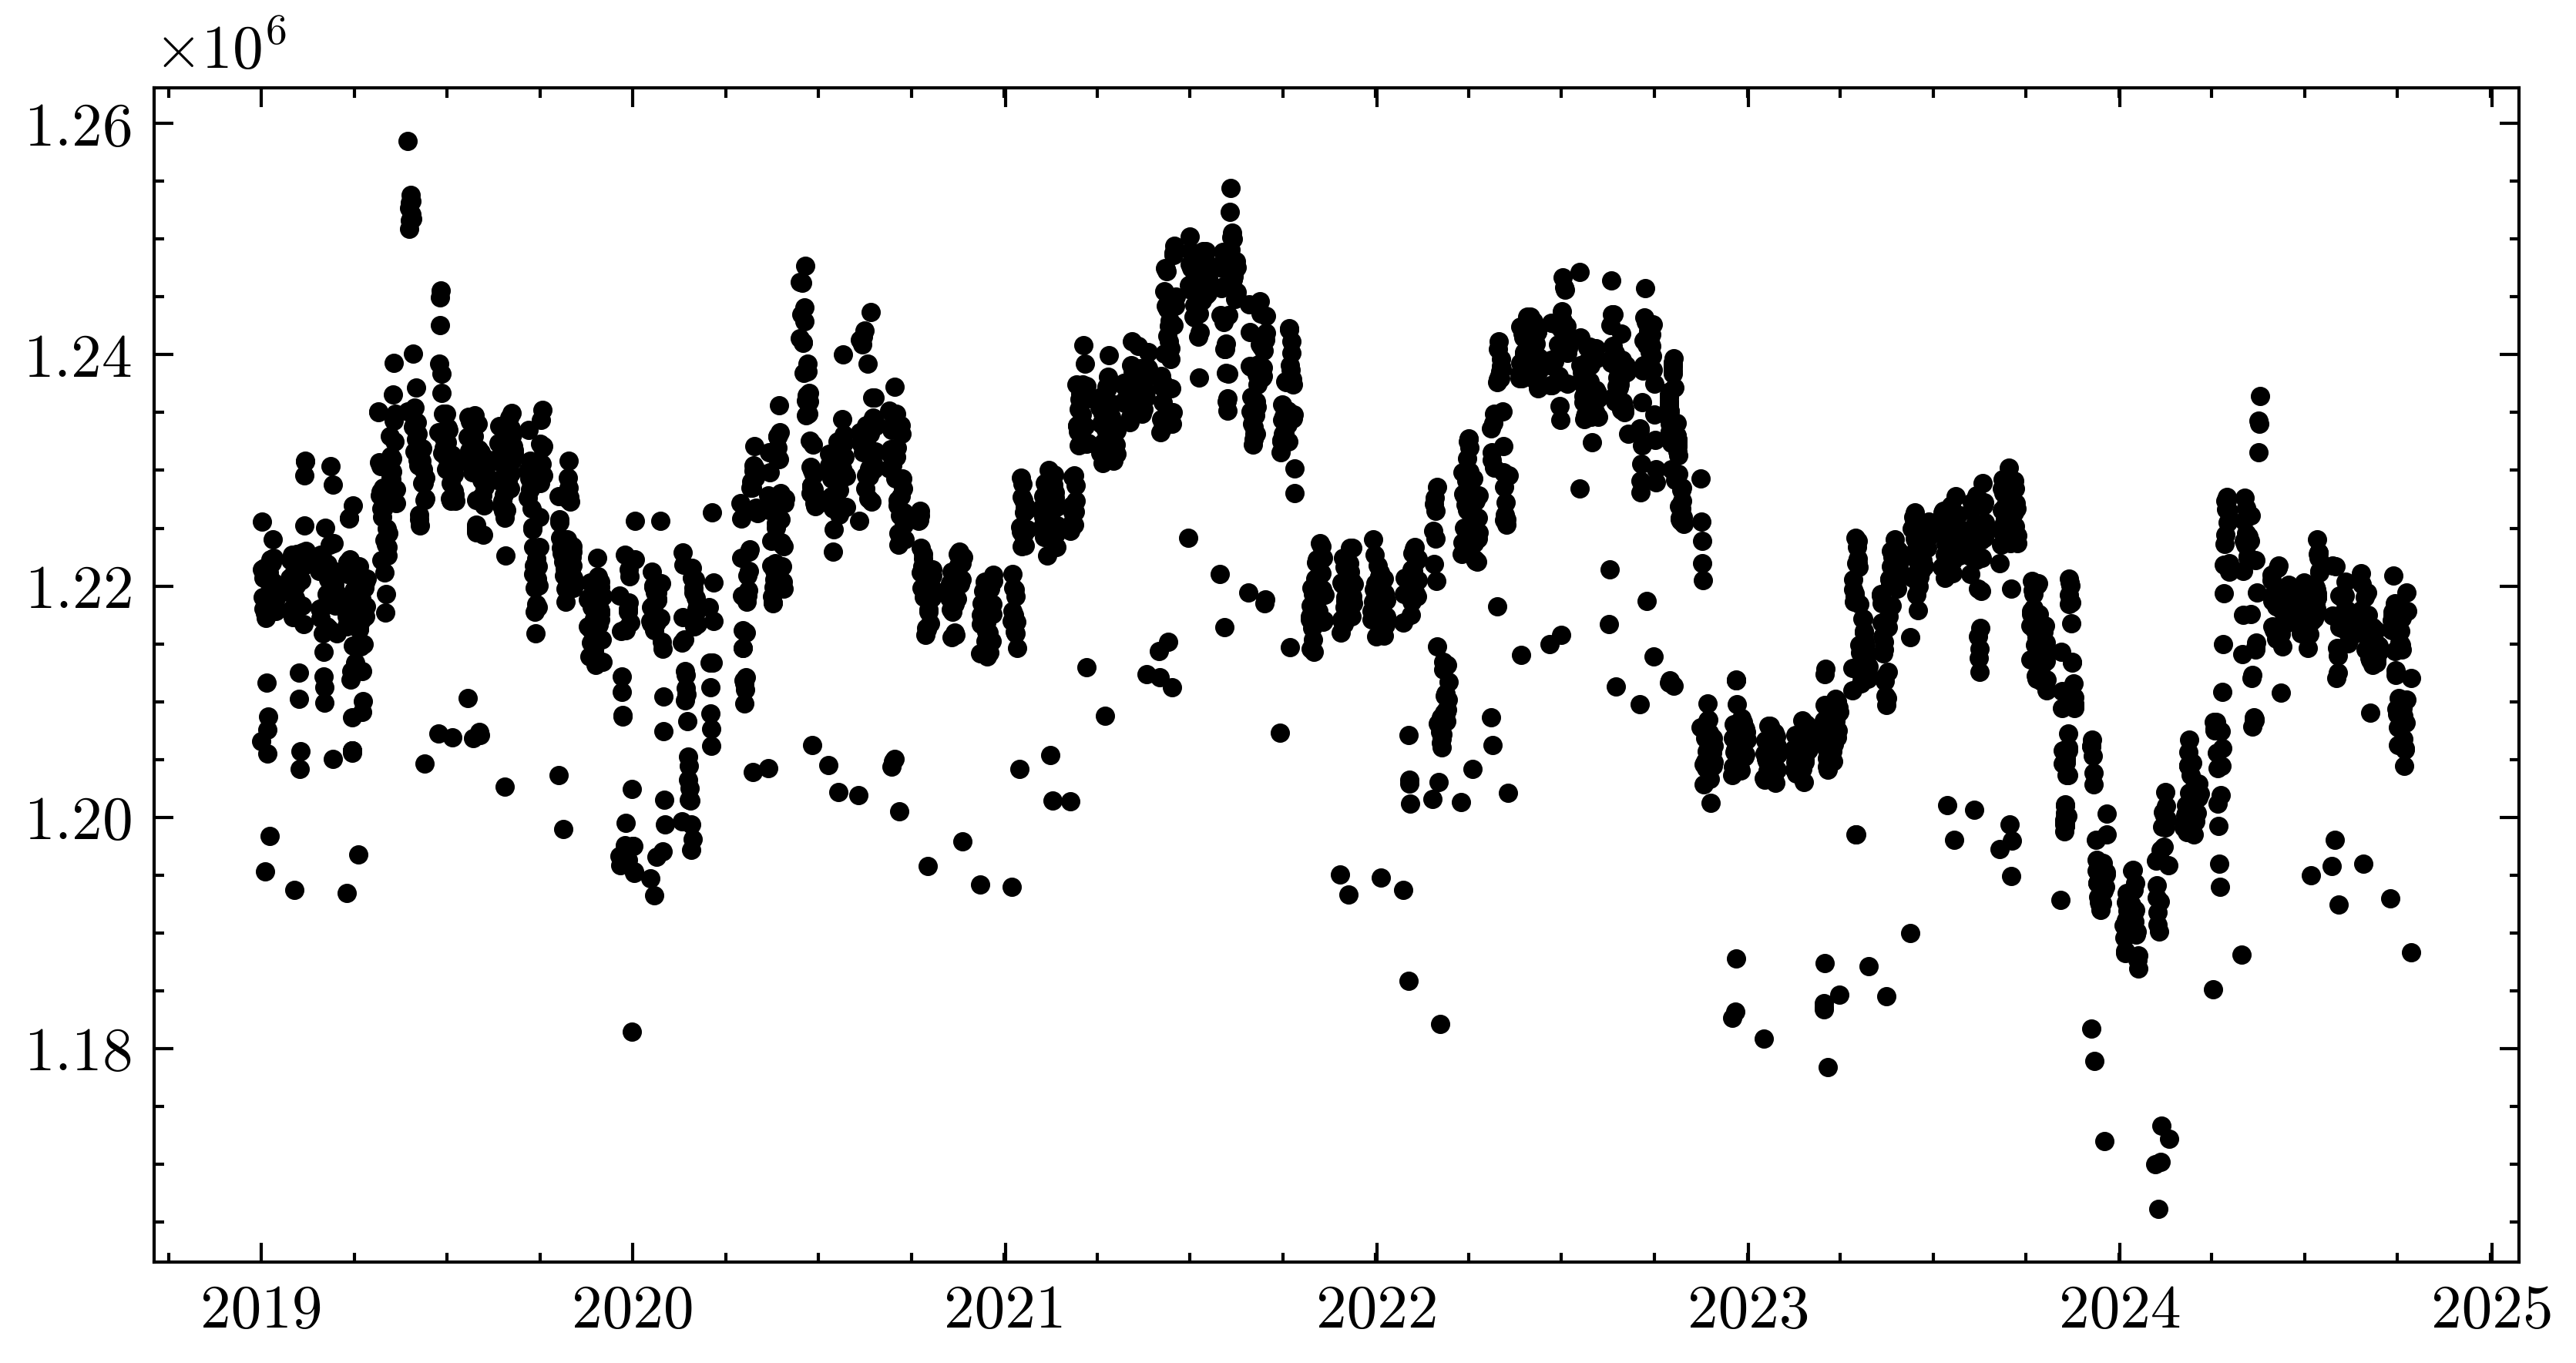

In [8]:
plt.scatter(x, y)
plot.apply_datetime_format(plt.gca())

In [45]:
print(x[-1])

2024-10-13 07:23:00
